## 00 |

In [1]:
# [Basic Libraries]
import os # file management 
import pandas as pd # data manipulation
import numpy as np # numerical operations

# [Machine Learning]
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # train/test sets
from sklearn.linear_model import LogisticRegression # logistic model
from sklearn.metrics import confusion_matrix # confussion matrix metric
from sklearn.metrics import classification_report # Metrics to check & compare our score

# [Settings]
import warnings
warnings.filterwarnings('ignore') # ignore warnings
pd.set_option('display.max_columns', None) # display all columns

## 01 | Data Extraction

In [2]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/unit_3_sql/lab-imbalanced-data/data", "Cdata.csv")
data = pd.read_csv(file_path)

## 02 | Manually increasing the imbalance

In [3]:
yes = data[data['churn']=='Yes'] # We select from data;'Yes' value from 'churn' column in data
no = data[data['churn']=='No'] # And the Nays ;)
len(yes) # How many yes do we have

1869

In [4]:
yes = yes.sample(500) # We take a sample of 500 yes
len(yes)

500

In [5]:
result = pd.merge(yes, no) # just a reminder. merge fails because there are no matching rows
result.head(10000400000290000)

,Unnamed: 0,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [6]:
data2 = pd.concat([yes,no], axis=0) # We do it with concat
data2.sample(5)

,Unnamed: 0,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1668,1668,9659-QEQSY,Female,0,No,No,45,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,115.65,5125.5,No
3107,3107,5038-ETMLM,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.65,8182.75,No
2433,2433,8314-DPQHL,Male,0,No,No,9,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,One year,No,Mailed check,50.80,463.6,No
3996,3996,1395-WSWXR,Male,0,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.75,487.05,No
5890,5890,0383-CLDDA,Female,0,No,No,69,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.35,5897.4,No


In [7]:
data2['churn'].value_counts() # Now we have:

No     5174
Yes     500
Name: churn, dtype: int64

In [8]:
data['churn'].value_counts() # And before:

No     5174
Yes    1869
Name: churn, dtype: int64

In [9]:
# Mixing the Data
data2 = data2.sample(frac=1) # Frac = How many data we want to mix 1=100%, 0.5=50%, so on...
data2.head()

,Unnamed: 0,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4856,4856,8714-EUHJO,Female,0,Yes,Yes,31,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,91.15,2995.45,Yes
1838,1838,8058-DMYRU,Male,1,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,4931.8,No
3269,3269,2662-NNTDK,Male,0,No,No,65,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),24.80,1600.95,No
5372,5372,2786-GCDPI,Female,1,No,No,50,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.95,5222.35,No
4986,4986,2694-CIUMO,Female,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),79.55,958.25,No


### X-Y Train Split

In [10]:
Y = data2['churn']
X = data2.select_dtypes(include=[np.number]) # Selecting Numericals
X.head()

,Unnamed: 0,seniorcitizen,tenure,monthlycharges
4856,4856,0,31,91.15
1838,1838,1,54,90.05
3269,3269,0,65,24.80
5372,5372,1,50,104.95
4986,4986,0,12,79.55


### Modeling

In [11]:
yes = data[data['churn']=='Yes'].sample(5174, replace=True) # Replace "True" to duplicate data, 5174 to fill it with the same number of Nays and Yeys
no = data[data['churn']=='No']
data3 = pd.concat([yes,no], axis=0)
data3 = data3.sample(frac=1)
data3['churn'].value_counts()

No     5174
Yes    5174
Name: churn, dtype: int64

In [12]:
# Normalazing the data
transformer = StandardScaler().fit(X)

# Transformation
X = transformer.transform(X)

# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

### Logistic Regression

In [13]:
# We traing the training dataset using Logistic Regression
logistic = LogisticRegression(random_state=0).fit(X_train, y_train)

# Predictions
predictions = logistic.predict(X_test)

confusion_matrix(y_test, predictions)

logistic.score(X_test, y_test)

0.9183793305930711

<blockquote style="background-color: #ffeeba; color: #856404; border-color: #ffeeba; padding: 10px; border-radius: 5px;">

After increasing the the imbalance, we got a 92% score. Is that all? Why is our model better after reducing even futher the number of `yes`?
</blockquote>

In [14]:
logistic_2 = classification_report(y_test, predictions) # Manually increasing imbalance
print(logistic_2)

              precision    recall  f1-score   support

          No       0.92      1.00      0.96      1561
         Yes       0.71      0.04      0.07       142

    accuracy                           0.92      1703
   macro avg       0.82      0.52      0.51      1703
weighted avg       0.90      0.92      0.88      1703



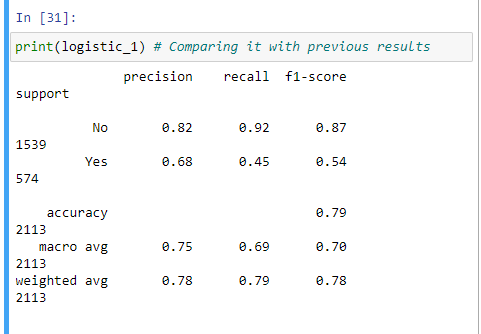

<blockquote style="background-color: #d4edda; color: #155724; border-color: #c3e6cb; padding: 10px; border-radius: 5px;">
    
Yes, our score is better but not the other metrics (macro avg, weighted avg) because the model is worst at predicting the `yes`
    
</blockquote>